In [51]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [52]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [53]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [54]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy


In [55]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

613

In [56]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [57]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0c31434299f1a4a0fce1a5bfa1b251f4


In [58]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [59]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


 

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mehamn
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | dingle
Processing Record 4 of Set 1 | port elizabeth
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | hami
Processing Record 7 of Set 1 | bluff
Processing Record 8 of Set 1 | antofagasta
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | marcona
City not found. Skipping...
Processing Record 14 of Set 1 | gurgan
City not found. Skipping...
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | natal
Processing Record 17 of Set 1 | atuona
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | hobart
Processing Record 20 of Set 1 | nikolskoye
Processing Record 21 of Set 1 | paamiut
Processing Record 22 of Set 1 | vaini
Pro

Processing Record 35 of Set 4 | tutoia
Processing Record 36 of Set 4 | praia
Processing Record 37 of Set 4 | castro
Processing Record 38 of Set 4 | frontera
Processing Record 39 of Set 4 | geoagiu
Processing Record 40 of Set 4 | jawhar
Processing Record 41 of Set 4 | nouadhibou
Processing Record 42 of Set 4 | mount gambier
Processing Record 43 of Set 4 | pangody
Processing Record 44 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 45 of Set 4 | broken hill
Processing Record 46 of Set 4 | codrington
Processing Record 47 of Set 4 | talnakh
Processing Record 48 of Set 4 | bathsheba
Processing Record 49 of Set 4 | itoman
Processing Record 50 of Set 4 | iqaluit
Processing Record 1 of Set 5 | mudgee
Processing Record 2 of Set 5 | saint george
Processing Record 3 of Set 5 | olafsvik
Processing Record 4 of Set 5 | grindavik
Processing Record 5 of Set 5 | raudeberg
Processing Record 6 of Set 5 | goderich
Processing Record 7 of Set 5 | akyab
Processing Record 8 of 

Processing Record 25 of Set 8 | virginia beach
Processing Record 26 of Set 8 | brae
Processing Record 27 of Set 8 | dondo
Processing Record 28 of Set 8 | la serena
Processing Record 29 of Set 8 | morro bay
Processing Record 30 of Set 8 | sangar
Processing Record 31 of Set 8 | balykshi
City not found. Skipping...
Processing Record 32 of Set 8 | kozelsk
Processing Record 33 of Set 8 | mogadishu
Processing Record 34 of Set 8 | aktash
Processing Record 35 of Set 8 | merzig
Processing Record 36 of Set 8 | visp
Processing Record 37 of Set 8 | pochutla
Processing Record 38 of Set 8 | narsaq
Processing Record 39 of Set 8 | kidal
Processing Record 40 of Set 8 | zaysan
Processing Record 41 of Set 8 | richards bay
Processing Record 42 of Set 8 | ucluelet
Processing Record 43 of Set 8 | coihaique
Processing Record 44 of Set 8 | lasa
Processing Record 45 of Set 8 | panacan
Processing Record 46 of Set 8 | fort nelson
Processing Record 47 of Set 8 | burica
City not found. Skipping...
Processing Recor

Processing Record 11 of Set 12 | mattru
Processing Record 12 of Set 12 | donskoye
Processing Record 13 of Set 12 | lata
Processing Record 14 of Set 12 | eureka
Processing Record 15 of Set 12 | tarudant
City not found. Skipping...
Processing Record 16 of Set 12 | cooma
Processing Record 17 of Set 12 | moree
Processing Record 18 of Set 12 | harper
Processing Record 19 of Set 12 | karpathos
Processing Record 20 of Set 12 | lakhdenpokhya
Processing Record 21 of Set 12 | texarkana
Processing Record 22 of Set 12 | nemuro
Processing Record 23 of Set 12 | sorland
Processing Record 24 of Set 12 | qazvin
Processing Record 25 of Set 12 | hobyo
Processing Record 26 of Set 12 | promyshlennyy
Processing Record 27 of Set 12 | roma
Processing Record 28 of Set 12 | bargal
City not found. Skipping...
Processing Record 29 of Set 12 | knysna
Processing Record 30 of Set 12 | vaijapur
Processing Record 31 of Set 12 | wagar
Processing Record 32 of Set 12 | oktyabrskoye
Processing Record 33 of Set 12 | porto 

In [60]:
len(city_data)

557

In [62]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mehamn,71.04,27.85,51.94,75,100,7.58,NO,2020-09-03 01:03:06
1,Albany,42.60,-73.97,73.99,89,100,4.00,US,2020-09-03 00:55:15
2,Dingle,11.00,122.67,85.17,75,100,1.39,PH,2020-09-03 01:04:30
3,Port Elizabeth,-33.92,25.57,53.60,54,0,8.05,ZA,2020-09-03 01:04:30
4,Hermanus,-34.42,19.23,55.99,95,50,8.01,ZA,2020-09-03 01:04:31
5,Hami,42.80,93.45,79.93,15,0,10.58,CN,2020-09-03 01:04:31
6,Bluff,-46.60,168.33,52.25,63,89,7.02,NZ,2020-09-03 00:56:18
7,Antofagasta,-23.65,-70.40,57.20,76,75,11.41,CL,2020-09-03 00:54:10
8,Puerto Ayora,-0.74,-90.35,66.00,89,76,3.00,EC,2020-09-03 00:56:10
9,Kapaa,22.08,-159.32,82.99,69,40,9.17,US,2020-09-03 00:56:03


In [65]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df [new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mehamn,NO,2020-09-03 01:03:06,71.04,27.85,51.94,75,100,7.58
1,Albany,US,2020-09-03 00:55:15,42.60,-73.97,73.99,89,100,4.00
2,Dingle,PH,2020-09-03 01:04:30,11.00,122.67,85.17,75,100,1.39
3,Port Elizabeth,ZA,2020-09-03 01:04:30,-33.92,25.57,53.60,54,0,8.05
4,Hermanus,ZA,2020-09-03 01:04:31,-34.42,19.23,55.99,95,50,8.01


In [66]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [67]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [69]:
# Insert the time module
import time

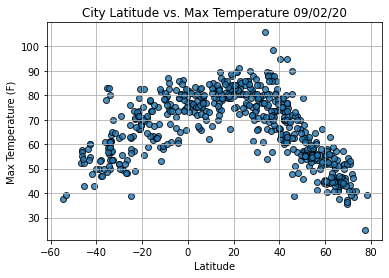

In [70]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

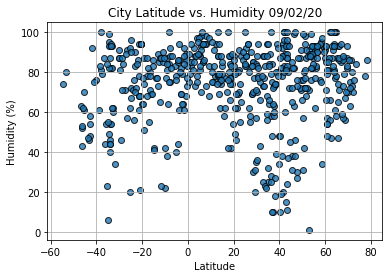

In [71]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

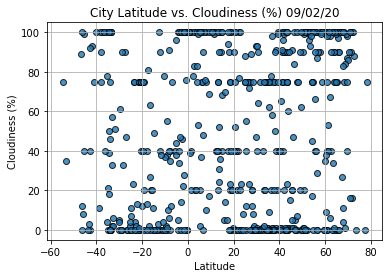

In [72]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


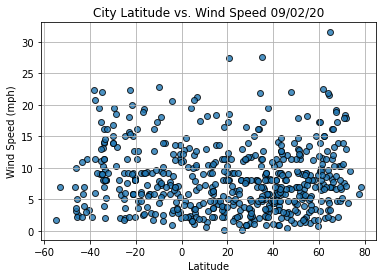

In [73]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()